In [46]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_All()

#Process_Class_Level()
Table_Class_Level = pd.read_csv('/home/jovyan/Data/Class_Level.csv')
Table_Race = pd.read_csv('/home/jovyan/Data/Race.csv')
Table_Gender = pd.read_csv('/home/jovyan/Data/Gender.csv')
Table_Alignment = pd.read_csv('/home/jovyan/Data/Alignment.csv')

#print(Table_Class_Level)
#print(Table_Race)
#print(Table_Gender)
#print(Table_Alignment)

In [47]:
Tab_Info = [['Class BD; Count',   Table_Class_Level, ["Class", "Sub-Class", "C_Count"]],
            ['Class BD; Level',   Table_Class_Level, ["Class", "Sub-Class", "L_Count"]],
            #['Race BD; Book',     Table_Race,        ["Source", "Race", "Count"]],
            ['Race BD; Sub-Race', Table_Race,        ["Race", "Tag3", "Count"]],
            ['Gender',Table_Gender, ["Gender", "Count"]],
           ]

Childs = []

for TI in Tab_Info:    
    Childs.append(get_Tab(TI[1], TI[2]))

tab = widgets.Tab(children=Childs)

Counter=0
for TI in Tab_Info:    
    tab.set_title(Counter, TI[0])
    Counter+=1

display(tab)

Unknown - nan
Alchemist - nan
Artificer - nan
Barbarian - nan
Bard - nan
Blood Hunter - nan
Captain - nan
Cleric - nan
Craftsman - nan
Druid - nan
Fighter - nan
Gunslinger - nan
Investigator - nan
Martyr - nan
Monk - nan
Mystic - nan
Necromancer - nan
Paladin - nan
Ranger - nan
Rogue - nan
Sorcerer - nan
Vessel - nan
Warden - nan
Warlock - nan
Warmage - nan
Witch - nan
Wizard - nan
Arcanist - nan
Astrologian - nan
Black Mage - nan
Blue Mage - nan
Dancer - nan
Dark Knight - nan
Dragoon - nan
Gunbreaker - nan
Machinist - nan
Reaper - nan
Red Mage - nan
Sage - nan
Samurai - nan
Warrior - nan
White Mage - nan
Unknown - nan
Alchemist - nan
Artificer - nan
Barbarian - nan
Bard - nan
Blood Hunter - nan
Captain - nan
Cleric - nan
Craftsman - nan
Druid - nan
Fighter - nan
Gunslinger - nan
Investigator - nan
Martyr - nan
Monk - nan
Mystic - nan
Necromancer - nan
Paladin - nan
Ranger - nan
Rogue - nan
Sorcerer - nan
Vessel - nan
Warden - nan
Warlock - nan
Warmage - nan
Witch - nan
Wizard - nan
Ar

Female - 114.0
GN (F) - 13.0
GN (N) - 3.0
GN (M) - 2.0
Male - 19.0


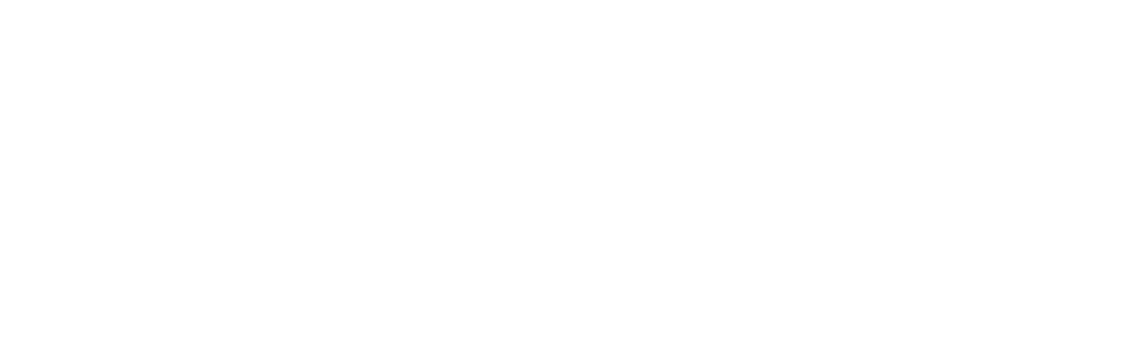

In [48]:
Display_Fig(Table_Gender, ["Gender", "Count"])